In [3]:
import pandas as pd

In [71]:
data = pd.read_csv('/COVID-19_Case_Surveillance_Public_Use_Data.csv')
data.head()

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2022/01/15,NaN,NaN,NaN,Laboratory-confirmed case,Male,70 - 79 Years,"White, Non-Hispanic",Missing,Missing,Missing,Missing
1,2023/01/30,2023/01/31,2023/01/30,2023/01/30,Laboratory-confirmed case,Male,70 - 79 Years,"White, Non-Hispanic",Yes,Missing,No,Missing
2,2020/10/09,2021/03/21,NaN,2020/10/09,Laboratory-confirmed case,Male,70 - 79 Years,"White, Non-Hispanic",Missing,Missing,Missing,Missing
3,2022/08/21,2022/08/29,2022/08/21,NaN,Laboratory-confirmed case,Male,70 - 79 Years,"White, Non-Hispanic",Missing,Missing,Missing,Missing
4,2021/12/31,2022/01/05,NaN,NaN,Laboratory-confirmed case,Male,70 - 79 Years,"White, Non-Hispanic",No,Missing,Yes,Missing


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846220 entries, 0 to 4846219
Data columns (total 12 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   cdc_case_earliest_dt     object
 1   cdc_report_dt            object
 2   pos_spec_dt              object
 3   onset_dt                 object
 4   current_status           object
 5   sex                      object
 6   age_group                object
 7   race_ethnicity_combined  object
 8   hosp_yn                  object
 9   icu_yn                   object
 10  death_yn                 object
 11  medcond_yn               object
dtypes: object(12)
memory usage: 443.7+ MB


In [73]:
data['age_group'].unique()


array(['70 - 79 Years', '80+ Years', nan, '0 - 9 Years', '20 - 29 Years',
       '60 - 69 Years', '50 - 59 Years', '10 - 19 Years', 'Missing',
       '40 - 49 Years'], dtype=object)

In [74]:
rep = {'0 - 9 Years':0, '10 - 19 Years':1, '20 - 29 Years': 2, '40 - 49 Years':4,
       '50 - 59 Years': 5, '60 - 69 Years':6, '70 - 79 Years':7, '80+ Years':8, 'Missing': -1}
data = data.replace({"age_group":rep})

In [75]:
data = data.loc[data["age_group"] != -1]

In [76]:
data["sex"].unique()

array(['Male', 'Unknown', 'Other', 'Female', 'Missing', 'Fema{', nan],
      dtype=object)

In [77]:
data = data.loc[(data["sex"] != "Unknown") & (data["sex"] !='Other') 
              & (data["sex"] != 'Missing') & (data["sex"] != 'Fema{') ]

In [78]:
data.value_counts(data["sex"])

sex
Female    3183718
Male      1527082
dtype: int64

In [79]:
data = data.drop([ "cdc_report_dt", "pos_spec_dt", "onset_dt",
                  "current_status","cdc_case_earliest_dt " ], axis=1)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4710804 entries, 0 to 4846219
Data columns (total 7 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   sex                      object 
 1   age_group                float64
 2   race_ethnicity_combined  object 
 3   hosp_yn                  object 
 4   icu_yn                   object 
 5   death_yn                 object 
 6   medcond_yn               object 
dtypes: float64(1), object(6)
memory usage: 287.5+ MB


In [81]:
data = data.dropna()

In [82]:
data.head()

,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,Male,7.0,"White, Non-Hispanic",Missing,Missing,Missing,Missing
1,Male,7.0,"White, Non-Hispanic",Yes,Missing,No,Missing
2,Male,7.0,"White, Non-Hispanic",Missing,Missing,Missing,Missing
3,Male,7.0,"White, Non-Hispanic",Missing,Missing,Missing,Missing
4,Male,7.0,"White, Non-Hispanic",No,Missing,Yes,Missing


In [83]:
data['hosp_yn'].unique()

array(['Missing', 'Yes', 'No', 'Unknown'], dtype=object)

In [84]:
data = data.loc[(data['hosp_yn'] != 'Missing') & (data['hosp_yn'] != 'Unknown')]

In [85]:
data.head()

,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
1,Male,7.0,"White, Non-Hispanic",Yes,Missing,No,Missing
4,Male,7.0,"White, Non-Hispanic",No,Missing,Yes,Missing
5,Male,7.0,"White, Non-Hispanic",No,Missing,Missing,Missing
7,Male,7.0,"White, Non-Hispanic",No,Missing,No,Missing
10,Male,7.0,"White, Non-Hispanic",No,Missing,Unknown,Missing


In [86]:
data['icu_yn'].unique()

array(['Missing', 'No', 'Yes', 'Unknown'], dtype=object)

In [87]:
data = data.loc[(data['icu_yn'] != 'Missing') & (data['icu_yn'] != 'Unknown')]

In [88]:
data['death_yn'].unique()

array(['Unknown', 'No', 'Missing', 'Yes'], dtype=object)

In [89]:
data = data.loc[(data['death_yn'] != 'Missing') & (data['death_yn'] != 'Unknown')]

In [90]:
data['medcond_yn'].unique()

array(['Yes', 'Missing', 'Unknown', 'No'], dtype=object)

In [91]:
data = data.loc[(data['medcond_yn'] != 'Missing') & (data['medcond_yn'] != 'Unknown')]

In [92]:
data.head()

,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
15,Male,7.0,"White, Non-Hispanic",Yes,No,No,Yes
57,Male,7.0,"White, Non-Hispanic",No,No,No,Yes
61,Male,7.0,"White, Non-Hispanic",Yes,No,No,Yes
141,Male,7.0,"White, Non-Hispanic",Yes,Yes,Yes,Yes
156,Male,7.0,"White, Non-Hispanic",No,No,No,Yes


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78020 entries, 15 to 4846174
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sex                      78020 non-null  object 
 1   age_group                78020 non-null  float64
 2   race_ethnicity_combined  78020 non-null  object 
 3   hosp_yn                  78020 non-null  object 
 4   icu_yn                   78020 non-null  object 
 5   death_yn                 78020 non-null  object 
 6   medcond_yn               78020 non-null  object 
dtypes: float64(1), object(6)
memory usage: 4.8+ MB


In [94]:
data = pd.get_dummies(data)
data.head()

,age_group,sex_Female,sex_Male,"race_ethnicity_combined_Asian, Non-Hispanic","race_ethnicity_combined_Black, Non-Hispanic",race_ethnicity_combined_Missing,"race_ethnicity_combined_Multiple/Other, Non-Hispanic",race_ethnicity_combined_Unknown,"race_ethnicity_combined_White, Non-Hispanic",hosp_yn_No,hosp_yn_Yes,icu_yn_No,icu_yn_Yes,death_yn_No,death_yn_Yes,medcond_yn_No,medcond_yn_Yes
15,7.0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,1
57,7.0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,1
61,7.0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,1
141,7.0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1
156,7.0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,1


In [68]:
pd.set_option('display.max_columns', None)

In [69]:
data.head()

,age_group,sex_Female,sex_Male,"race_ethnicity_combined_Asian, Non-Hispanic","race_ethnicity_combined_Black, Non-Hispanic",race_ethnicity_combined_Missing,"race_ethnicity_combined_Multiple/Other, Non-Hispanic",race_ethnicity_combined_Unknown,"race_ethnicity_combined_White, Non-Hispanic",hosp_yn_Missing,hosp_yn_No,hosp_yn_Unknown,hosp_yn_Yes,icu_yn_Missing,icu_yn_No,icu_yn_Unknown,icu_yn_Yes,death_yn_Missing,death_yn_No,death_yn_Unknown,death_yn_Yes,medcond_yn_Missing,medcond_yn_No,medcond_yn_Unknown,medcond_yn_Yes
0,7.0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
1,7.0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0
2,7.0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,7.0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,7.0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0


In [95]:
data.corr()

,age_group,sex_Female,sex_Male,"race_ethnicity_combined_Asian, Non-Hispanic","race_ethnicity_combined_Black, Non-Hispanic",race_ethnicity_combined_Missing,"race_ethnicity_combined_Multiple/Other, Non-Hispanic",race_ethnicity_combined_Unknown,"race_ethnicity_combined_White, Non-Hispanic",hosp_yn_No,hosp_yn_Yes,icu_yn_No,icu_yn_Yes,death_yn_No,death_yn_Yes,medcond_yn_No,medcond_yn_Yes
age_group,1.000000,-0.214797,0.214797,0.325810,0.701380,0.056096,0.020906,-0.395210,-0.270826,-0.520240,0.520240,-0.394661,0.394661,-0.437182,0.437182,-0.404150,0.404150
sex_Female,-0.214797,1.000000,-1.000000,0.054545,-0.548268,0.011951,-0.211601,-0.618556,0.838868,0.312944,-0.312944,0.244386,-0.244386,0.271019,-0.271019,0.126064,-0.126064
sex_Male,0.214797,-1.000000,1.000000,-0.054545,0.548268,-0.011951,0.211601,0.618556,-0.838868,-0.312944,0.312944,-0.244386,0.244386,-0.271019,0.271019,-0.126064,0.126064
"race_ethnicity_combined_Asian, Non-Hispanic",0.325810,0.054545,-0.054545,1.000000,-0.029906,-0.003044,-0.023447,-0.033739,-0.244426,-0.163047,0.163047,-0.123789,0.123789,-0.144417,0.144417,-0.114414,0.114414
"race_ethnicity_combined_Black, Non-Hispanic",0.701380,-0.548268,0.548268,-0.029906,1.000000,-0.006553,-0.050475,-0.072632,-0.526182,-0.478958,0.478958,-0.375500,0.375500,-0.428342,0.428342,-0.316540,0.316540
race_ethnicity_combined_Missing,0.056096,0.011951,-0.011951,-0.003044,-0.006553,1.000000,-0.005137,-0.007393,-0.053556,-0.012199,0.012199,-0.009910,0.009910,-0.008027,0.008027,-0.023256,0.023256
"race_ethnicity_combined_Multiple/Other, Non-Hispanic",0.020906,-0.211601,0.211601,-0.023447,-0.050475,-0.005137,1.000000,-0.056945,-0.412543,-0.046452,0.046452,-0.031200,0.031200,-0.015155,0.015155,-0.025127,0.025127
race_ethnicity_combined_Unknown,-0.395210,-0.618556,0.618556,-0.033739,-0.072632,-0.007393,-0.056945,1.000000,-0.593639,0.056383,-0.056383,0.039054,-0.039054,0.046869,-0.046869,0.142619,-0.142619
"race_ethnicity_combined_White, Non-Hispanic",-0.270826,0.838868,-0.838868,-0.244426,-0.526182,-0.053556,-0.412543,-0.593639,1.000000,0.325674,-0.325674,0.255080,-0.255080,0.280149,-0.280149,0.144242,-0.144242
hosp_yn_No,-0.520240,0.312944,-0.312944,-0.163047,-0.478958,-0.012199,-0.046452,0.056383,0.325674,1.000000,-1.000000,0.541496,-0.541496,0.488134,-0.488134,0.311446,-0.311446


In [46]:
import seaborn as sns

<Axes: >

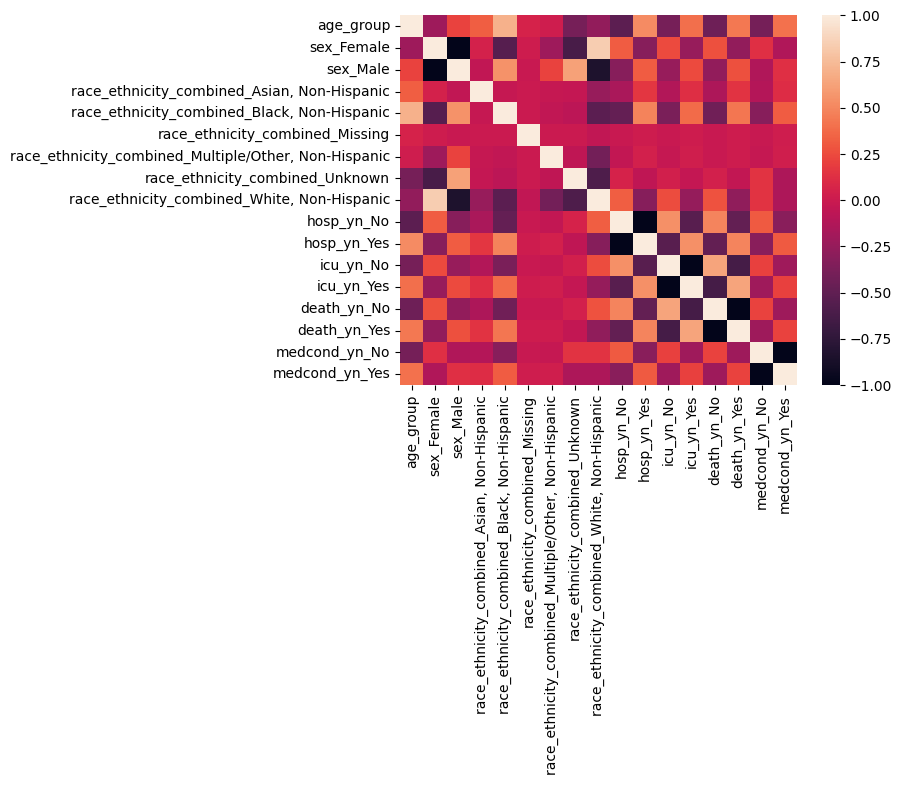

In [96]:
sns.heatmap(data.corr())

In [48]:
import numpy as np
import statsmodels.api as sm

In [97]:
Y = data['death_yn_Yes']
X = data[['age_group', 'race_ethnicity_combined_Black, Non-Hispanic', 'hosp_yn_Yes',
          'icu_yn_Yes','medcond_yn_Yes']]

model = sm.OLS(Y, sm.add_constant(X)).fit()
params = model.params
params

const                                         -0.020540
age_group                                      0.009603
race_ethnicity_combined_Black, Non-Hispanic    0.080214
hosp_yn_Yes                                    0.061312
icu_yn_Yes                                     0.465681
medcond_yn_Yes                                 0.000663
dtype: float64

In [50]:
import statsmodels.formula.api as smf

In [98]:
df = pd.DataFrame({'age_group':data['age_group'], 
                   'race':data['race_ethnicity_combined_Black, Non-Hispanic'],
                   'hosp_yn_Yes':data['hosp_yn_Yes'],'icu_yn_Yes':data['icu_yn_Yes'],
                   'medcond_yn_Yes':data['medcond_yn_Yes'],
                   'death_yn_Yes':data['death_yn_Yes']})
model = smf.ols('death_yn_Yes ~ age_group + race + hosp_yn_Yes + icu_yn_Yes + medcond_yn_Yes', data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           death_yn_Yes   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                 1.359e+04
Date:                Thu, 01 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:11:30   Log-Likelihood:                 56031.
No. Observations:               78020   AIC:                        -1.120e+05
Df Residuals:                   78014   BIC:                        -1.120e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0205      0.001    -24.